### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [ ]:
data = pd.read_csv("/content/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.shape

(891, 12)

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.size

10692

### Data Preprocessing

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Sex'] = data['Sex'].map({'male':1,'female':0}).astype(int)

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
data['Embarked'].fillna("S", inplace = True)

In [ ]:
data =pd.get_dummies(data,columns=['Embarked'])

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1,0,0


In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
data.drop('Cabin', axis=1, inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [ ]:
data2 = data[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked_C', 'Embarked_Q','Embarked_S']]
data2.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Data Split

In [ ]:
X = data2.iloc[:,:].values
y = data['Survived'].values
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}
lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(X_train,y_train)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print("Accuracy on Training Set: {:.2f}".format(lr_grid_model.best_score_ * 100))

Accuracy on Training Set: 80.42


In [ ]:
LR_Grid_Score = Best_Logistic_Regression_Model.score(X_test, y_test)
print("Accuracy By Best Logistic Regression Model:",LR_Grid_Score*100)

Accuracy By Best Logistic Regression Model: 80.22388059701493


### Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf.fit(X_train,y_train)
RF_Score = rf.score(X_test, y_test)
print("Accuracy By Best RandomForest Model:",RF_Score*100)

Accuracy By Best RandomForest Model: 82.83582089552239


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=10 ,criterion='entropy',min_samples_split=5,min_samples_leaf=4,max_features=10,random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

In [ ]:
y_train_pred_dt = decision_tree_model.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.28


In [ ]:
from sklearn.metrics import accuracy_score
DT_Score = decision_tree_model.score(X_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 85.44776119402985


### XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred= clf.predict(X_test)
XG_score = accuracy_score(y_test,y_pred)
print("Accuracy By XG Boost Model:",XG_score*100)

Accuracy By XG Boost Model: 81.34328358208955


### Data Visualization

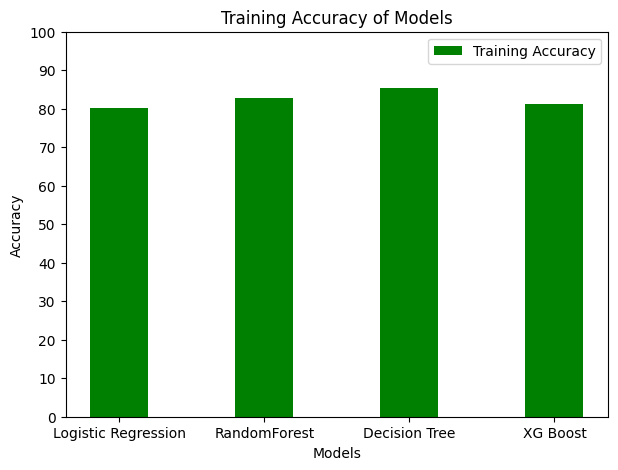

In [ ]:
model_names = ['Logistic Regression', 'RandomForest','Decision Tree','XG Boost']
train_accuracies = [LR_Grid_Score*100,RF_Score*100,DT_Score*100,XG_score*100]
plt.figure(figsize=(7, 5))
plt.bar(model_names, train_accuracies, label='Training Accuracy', color = "green", width = 0.4)
plt.yticks(np.arange(0, 101, 10))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training Accuracy of Models')
plt.legend()
plt.show()